# Classifying Fashion MNIST using Convolutional Neural Networks

Dataset: Fashion MNIST, images of clothes, shoes etc.

Train an Convolutional Neural Network to classify these images. Test accuracy 92%.

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, Input, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [50]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)= fashion_mnist.load_data()

X_train, X_test = 2*(X_train/255.)-1 , 2*(X_test/255.)-1.

In [51]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

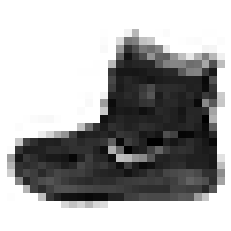

Ankle boot


In [52]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()
print(class_names[y_train[0]])

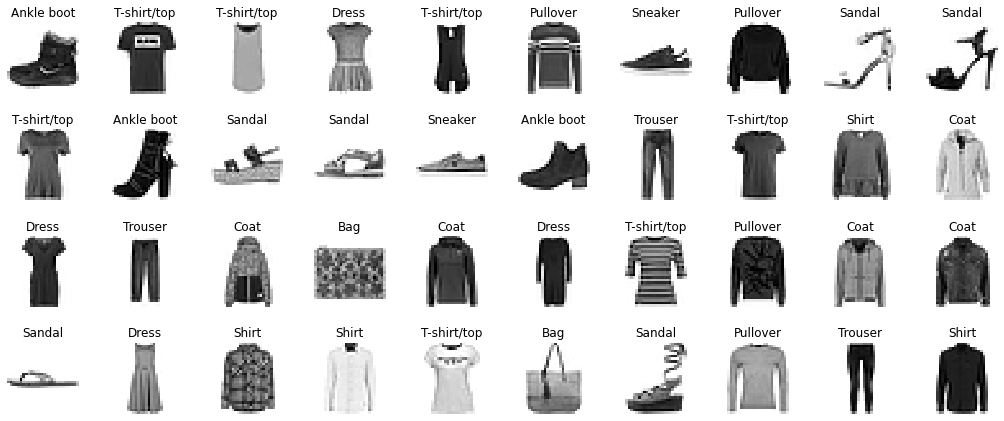

In [53]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.8, n_rows * 1.8))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Designing the classifier

We design the neural network using Convolutional, Pooling, and Dense layers. We also use dropout and Batch Normalization.

The resulting neural network has roughly the same number of parameters $(\sim 400,000)$ as the MLP. It reaches a train set

accuracy of 93\% vs the MLP accuracy of 88.6\%.

In [54]:
regularizer = tf.keras.regularizers.L1L2(l1=1e-5,l2=1e-4)
def build_model(inputShape,n_classes):
    # specify the inputs for the feature extractor network
    inputs = Input(inputShape)
    # define the first set of CONV => RELU => POOL => DROPOUT layers
    x = Conv2D(32, (3, 3), padding="same", activation="relu",
               kernel_regularizer=regularizer)(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    # second set of CONV => RELU => POOL => DROPOUT layers
    x = Conv2D(64, (3, 3), padding="same", activation="relu",
               kernel_regularizer=regularizer)(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    # prepare the final outputs
    unrolled= Flatten()(x)
    unrolled= Dense(128,activation='relu',
                    kernel_regularizer=regularizer)(unrolled)
    unrolled = BatchNormalization()(unrolled)
    unrolled= Dense(64,activation='relu',
                    kernel_regularizer=regularizer)(unrolled)
    output = Dense(n_classes,activation='softmax')(unrolled)
    # build the model
    model = Model(inputs, output)
    # return the model to the calling function
    return model

In [55]:
X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)

In [56]:
numclasses = len(np.unique(y_train))
model=build_model(X_train[0].shape,numclasses)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
              metrics =['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        1849

# Training the Neural Network

We now train the model using $\mathtt{model.fit}$. Note the argument _validation_split_ passed to this function. 

Neural networks are typically trained while comparing with the validation data at each epoch. This gives us a monitor of possible overfitting even while the network is training.

We can also use this monitor as a means to control overfitting, see _early stopping_

In [57]:
epochs = 50
batch_size = 32

history = model.fit(X_train,y_train,validation_split=0.1,
                    epochs=epochs,batch_size = batch_size)

Epoch 1/50
1688/1688 [==============================] - 10s 5ms/step - loss: 0.5364 - accuracy: 0.8617 - val_loss: 0.5073 - val_accuracy: 0.8738
Epoch 2/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4442 - accuracy: 0.8956 - val_loss: 0.4376 - val_accuracy: 0.8968
Epoch 3/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4306 - accuracy: 0.9052 - val_loss: 0.4465 - val_accuracy: 0.8997
Epoch 4/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4192 - accuracy: 0.9104 - val_loss: 0.4493 - val_accuracy: 0.9042
Epoch 5/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4148 - accuracy: 0.9140 - val_loss: 0.4641 - val_accuracy: 0.8972
Epoch 6/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4054 - accuracy: 0.9180 - val_loss: 0.4627 - val_accuracy: 0.8913
Epoch 7/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3948 - accuracy: 0.9227 - val_loss: 0.4131 - val_accuracy

# Results

We reached a training loss of about 0.28 and validation loss of 0.35. Regularization, Dropout and Batch Normalization mitigate overfitting in the neural network. Indeed the model reaches an accuracy of 0.94 on the train data while the accuracy on the validation data is 0.92, roughly comparable.

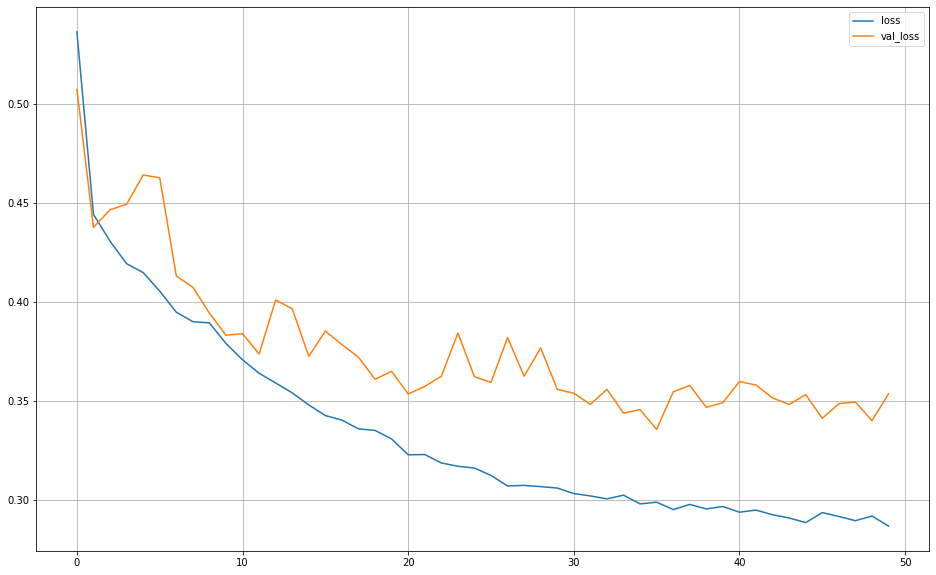

In [58]:
pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(16, 10))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

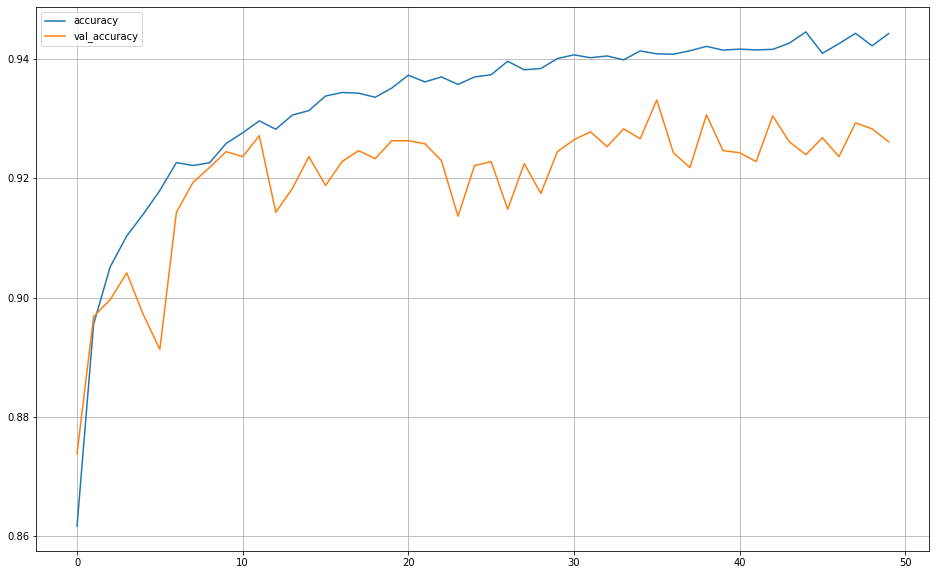

In [59]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(figsize=(16, 10))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Evaluating the model

The validation data above was supposed to be a placeholder for actual unseen data. We estimate that the model should reach a loss of 0.34 and an accuracy of 0.89 on unseen data.

We can check this by evaluating the model on test data. The actual numbers are not too far off from our expectations. The loss is 0.37 and the accuracy is 0.88

In [60]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3722 - accuracy: 0.9209
Test loss: 0.37219950556755066
Test accuracy: 0.9208999872207642


In [61]:
y_pred = np.argmax(model.predict(X_test),axis=-1)
y_test_ordinal = np.argmax(y_test,axis=-1)

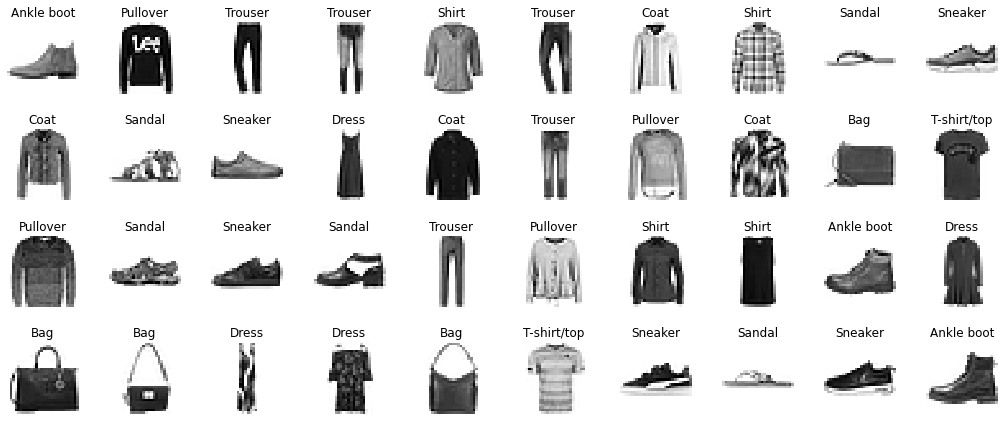

In [62]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.8, n_rows * 1.8))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(np.squeeze(X_test[index]), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [63]:
misclassified=np.where(y_pred!=y_test)[0]
X_misclassified = X_test[misclassified]
y_misclassified = y_pred[misclassified]

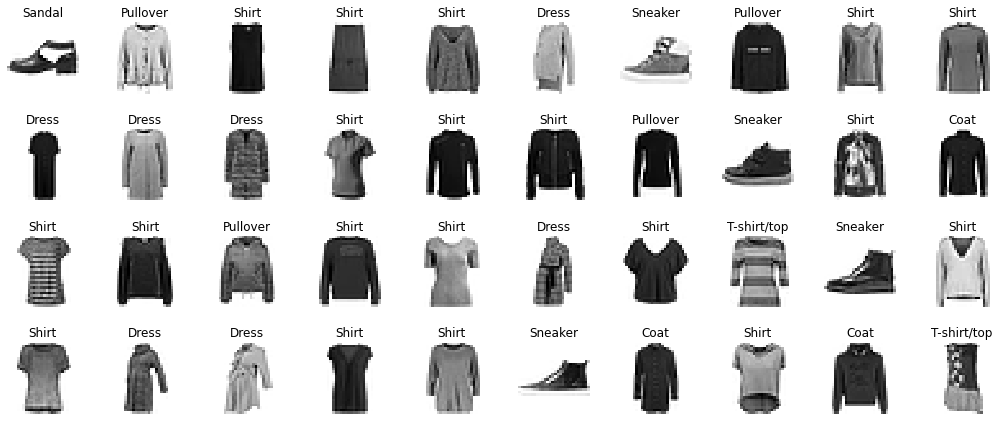

In [64]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.8, n_rows * 1.8))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(np.squeeze(X_misclassified[index]), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_misclassified[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [65]:
print(confusion_matrix(y_test,y_pred))

[[790   1   7  25   1   3 169   0   4   0]
 [  1 983   1  11   0   0   2   0   2   0]
 [ 12   1 856   9  46   0  76   0   0   0]
 [  7   1   7 964   7   0  13   0   1   0]
 [  0   0  33  32 891   0  42   0   2   0]
 [  0   0   0   0   0 995   0   4   0   1]
 [ 46   1  30  28  60   0 829   0   6   0]
 [  0   0   0   0   0   8   0 983   0   9]
 [  2   1   0   3   1   9   3   3 978   0]
 [  0   0   0   0   0  11   0  49   0 940]]
